**Projet Accident aérien**

**1 - Extraction des titres**

In [ ]:
! pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 813.8 kB/s eta 0:00:00


In [ ]:
! apt-get install python3-pypdf2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  python3-pypdf2
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 51.0 kB of archives.
After this operation, 264 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pypdf2 all 1.26.0-4ubuntu0.22.04.2 [51.0 kB]
Fetched 51.0 kB in 1s (93.6 kB/s)
Selecting previously unselected package python3-pypdf2.
(Reading database ... 121666 files and directories currently installed.)
Preparing to unpack .../python3-pypdf2_1.26.0-4ubuntu0.22.04.2_all.deb ...
Unpacking python3-pypdf2 (1.26.0-4ubuntu0.22.04.2) ...
Setting up python3-pypdf2 (1.26.0-4ubuntu0.22.04.2) ...


In [ ]:
import os
import PyPDF2
import csv

# Chemin d'accès vers le dossier contenant les fichiers PDF
pdf_folder_path = r"/content/drive/MyDrive/TPE_Mon_Travail/Rapport_BEA"

# Chemin d'accès vers le fichier CSV de sortie
csv_output_path = r"/content/drive/MyDrive/TPE_Mon_Travail/dataset_title.csv"

# Créer un fichier CSV pour stocker les données
with open(csv_output_path, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['id', 'pdf_title'])  # Écrire l'en-tête du CSV

    # Liste des noms de fichiers PDF
    pdf_file_names = os.listdir(pdf_folder_path)

    # Parcourir chaque fichier PDF
    for idx, pdf_file_name in enumerate(pdf_file_names, start=1):  # Commencer à partir de 1
        pdf_file_path = os.path.join(pdf_folder_path, pdf_file_name)

        # Vérifier si c'est un fichier (et non un répertoire)
        if os.path.isfile(pdf_file_path) and pdf_file_path.lower().endswith('.pdf'):
            # Supprimer le texte "Conséquences et dommages" du nom du fichier
            pdf_file_name = pdf_file_name.replace("Conséquences et dommages", "").strip()

            # Utiliser PyPDF2 pour extraire le texte du PDF
            with open(pdf_file_path, 'rb') as pdf_file:
                pdf_reader = PyPDF2.PdfReader(pdf_file)
                pdf_text = ""
                for page_num in range(len(pdf_reader.pages)):
                    pdf_text += pdf_reader.pages[page_num].extract_text()

                # Extraire la valeur de l'attribut "Conséquences et dommages"
                start_idx = pdf_text.find("Conséquences et dommages")
                end_idx = pdf_text.find("\n", start_idx)
                consequence_value = pdf_text[start_idx:end_idx].strip()

                # Écrire les données dans le fichier CSV
                csv_writer.writerow([idx, pdf_file_name, consequence_value])

print("Extraction et enregistrement dans le fichier CSV terminés.")


Extraction et enregistrement dans le fichier CSV terminés.


**2 - Nettoyage des titres extraits**

In [ ]:
import pandas as pd
import re

# Chemin vers le fichier CSV
csv_file_path = r"/content/drive/MyDrive/TPE_Mon_Travail/dataset_title.csv"

# Lire le fichier CSV en utilisant pandas
data = pd.read_csv(csv_file_path, encoding='utf-8')

# Supprimer l'expression "Conséquences et dommages" de la colonne "pdf_title"
data['pdf_title'] = data['pdf_title'].str.replace('Conséquences et dommages', '')

# Supprimer l'expression "Sauf précision" de la colonne "pdf_title"
data['pdf_title'] = data['pdf_title'].str.replace('Sauf précision', '')

# Liste des articles à supprimer
articles_a_supprimer = ["le", "la", "les", "de", "du", "des", "un", "une", "au", "avant", "à", "et", "en", "dans", "que", "qui", "qu'", "autre", "dont", "sur", "il", "nous", "ce", "ces", "se", "donc", "alors"]

# Fonction pour nettoyer le texte en supprimant les articles, la ponctuation et les caractères spéciaux
def nettoyer_texte(texte):
    # Convertir la valeur en chaîne de caractères
    texte = str(texte)

    # Supprimer la ponctuation et les caractères spéciaux avec une expression régulière
    texte = re.sub(r'[^\w\s]', '', texte)

    # Gérer le cas de "d étruit" spécifiquement
    texte = re.sub(r'\bd\sétruit\b', 'détruit', texte, flags=re.IGNORECASE)

    # Utiliser une expression régulière pour séparer les mots
    mots = re.findall(r'\b\w+\b', texte)

    # Filtrer les mots en supprimant les articles et autres mots spécifiques
    mots_filtrés = [mot for mot in mots if mot.lower() not in articles_a_supprimer]

    # Rejoindre les mots filtrés pour former le texte nettoyé
    texte_nettoyé = ' '.join(mots_filtrés)

    # Remplacer les mots spécifiques
    mots_a_remplacer = ["ULM", "paramoteur", "hélicoptère", "aéronef", "planeur", "Planeur"]
    for mot in mots_a_remplacer:
        texte_nettoyé = texte_nettoyé.replace(mot, 'avion')

    return texte_nettoyé

# Appliquer la fonction de nettoyage à la colonne "pdf_title"
data['pdf_title'] = data['pdf_title'].apply(nettoyer_texte)

# Supprimer les caractères numériques
data['pdf_title'] = data['pdf_title'].apply(lambda x: re.sub(r'\d', '', x))

# Enregistrer le résultat dans un nouveau fichier CSV
cleaned_csv_file_path = r"/content/drive/MyDrive/TPE_Mon_Travail/BD1_Title.csv"
data.to_csv(cleaned_csv_file_path, index=False)

# Afficher les premières lignes du DataFrame nettoyé
print(data)


                   id                                     pdf_title
1          F-HPTI.pdf               Hélicoptère fortement endommagé
2           21AJD.pdf                   Pilote décédé avion détruit
3          F-GTPV.pdf        Pilote passagers décédés avion détruit
4          F-HMYY.pdf       Pilote deux passagers décédés passagère
5          F-GYFR.pdf                               passager blessé
..                ...                                           ...
196  BEA2020-0165.pdf         Pilote gravement blessé avion détruit
197  BEA2020-0418.pdf                    Ballon fortement endommagé
198  BEA2019-0289.pdf           Élèvepilote légèrement blessé avion
199  BEA2020-0373.pdf  Pilote décédé avion détruit avion dispositif
200  BEA2020-0094.pdf  Personne aux commandes décédée avion détruit

[200 rows x 2 columns]


**3 - Lemmatisation** **du** **contenu** **pdf_title**

In [ ]:
import spacy
import pandas as pd

# Charger le modèle téléchargé
nlp = spacy.load("fr_core_news_lg")

# Chemin d'entrée et de sortie des fichiers CSV
chemin_entree = r"/content/drive/MyDrive/TPE_Mon_Travail/BD1_Title.csv"
chemin_sortie = r"/content/drive/MyDrive/TPE_Mon_Travail/BD1_Title_Lemma.csv"

# Lire le fichier CSV en utilisant pandas avec un encodage spécifié
data = pd.read_csv(chemin_entree, encoding="utf-8")

# Créer une liste pour stocker les résultats
resultats = []

# Appliquer la transformation sur chaque ligne du fichier
for index, row in data.iterrows():
    # Vérifier le type de la valeur dans la colonne "pdf_title"
    if isinstance(row["pdf_title"], str):
        # Appliquer le modèle de langue sur le texte de chaque ligne
        doc = nlp(row["pdf_title"])

        # Lemmatisation des mots dans le texte
        lemmes = [token.lemma_ for token in doc]

        # Joindre les lemmes pour former un texte lemmatisé
        texte_lemmatise = " ".join(lemmes)

        # Ajouter le texte lemmatisé aux résultats
        resultats.append([row["id"], texte_lemmatise])  # Stocke l'id et le texte lemmatisé
    else:
        # Handle other types if needed
        resultats.append([row["id"], ""])

# Créer un DataFrame à partir des résultats
df_resultats = pd.DataFrame(resultats, columns=["id", "pdf_title_lemmatized"])  # Deux colonnes

# Sauvegarder le DataFrame dans le fichier de sortie avec un encodage spécifié
df_resultats.to_csv(chemin_sortie, index=False, encoding="utf-8")

# Afficher le contenu du fichier de sortie
print(df_resultats)


                   id                            pdf_title_lemmatized
0          F-HPTI.pdf                hélicoptère fortement endommager
1           21AJD.pdf                   pilote décéder avion détruire
2          F-GTPV.pdf          pilote passager décéder avion détruire
3          F-HMYY.pdf           pilote deux passager décéder passager
4          F-GYFR.pdf                                passager blesser
..                ...                                             ...
195  BEA2020-0165.pdf         pilote gravement blesser avion détruire
196  BEA2020-0418.pdf                     Ballon fortement endommager
197  BEA2019-0289.pdf            élèvepilote légèrement blesser avion
198  BEA2020-0373.pdf  pilote décéder avion détruire avion dispositif
199  BEA2020-0094.pdf      personne à commande décéder avion détruire

[200 rows x 2 columns]


**Pourquoi Lemmatiser un contenu de caractère ?**

La lemmatisation est un processus important dans le traitement du langage naturel (NLP) qui vise à réduire les mots à leur forme de base ou lemmes. La lemmatisation est effectuée pour plusieurs raisons importantes :

**Normalisation :** La lemmatisation contribue à normaliser les mots, en réduisant les mots fléchis ou conjugés à leur forme de base. Par exemple, les mots "courir", "court", "courant", "courait" sont tous réduits à leur lemme "courir". Cela simplifie la comparaison de mots et améliore la précision des analyses textuelles.

**Réduction de la dimension :** La lemmatisation réduit la dimension du vocabulaire en remplaçant les formes fléchies ou dérivées par leurs lemmes correspondants. Cela permet de travailler avec un ensemble de mots plus restreint, ce qui est utile pour la classification, la regroupement (clustering) et d'autres tâches de NLP.

**Amélioration de la recherche d'information :** La lemmatisation facilite la recherche de documents pertinents. En réduisant les mots à leur forme de base, la lemmatisation permet d'inclure les formes fléchies et les lemmes dans une recherche, ce qui augmente les chances de trouver des informations pertinentes.

**Traitement de la flexion verbale et nominale :** En français, comme dans d'autres langues, les verbes et les noms peuvent prendre de nombreuses formes fléchies. La lemmatisation aide à gérer ces variations, ce qui est particulièrement utile dans le cadre de l'analyse de texte, de la recherche d'information et de la classification.

**Amélioration de la cohérence :** La lemmatisation améliore la cohérence en normalisant le texte, ce qui facilite la comparaison de textes et la détection de similitudes.

Donc, la lemmatisation est un processus essentiel dans le traitement du langage naturel qui permet de simplifier, normaliser et améliorer la qualité de l'analyse des textes. Elle est particulièrement utile pour rendre les données textuelles plus faciles à traiter, à comparer et à analyser.

**4 - Bag ofword**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Charger le fichier CSV
data = pd.read_csv(r"/content/drive/MyDrive/TPE_Mon_Travail/BD1_Title_Lemma.csv")  # Assurez-vous que le chemin est correct

# Remplacer les NaN par des chaînes vides dans la colonne "pdf_title_lemmatized"
data["pdf_title_lemmatized"] = data["pdf_title_lemmatized"].fillna("")

# Récupérer les textes à partir du DataFrame
textes = data["pdf_title_lemmatized"]

# Créer une instance du vectoriseur BoW
vectorizer = CountVectorizer()

# Adapter le vectoriseur aux textes et transformer les textes en vecteurs BoW
bow_matrix = vectorizer.fit_transform(textes)

# Créer un DataFrame pour les vecteurs BoW
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Ajouter la colonne "id" du DataFrame d'origine en première colonne
bow_df.insert(0, "id", data["id"])

# Enregistrer le DataFrame dans un fichier CSV
bow_df.to_csv(r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-BOW_Title.csv", index=False)

print(bow_df)


                   id  agent  arrière  autogir  avion  avoir  aéronef  \
0          F-HPTI.pdf      0        0        0      0      0        0   
1           21AJD.pdf      0        0        0      1      0        0   
2          F-GTPV.pdf      0        0        0      1      0        0   
3          F-HMYY.pdf      0        0        0      0      0        0   
4          F-GYFR.pdf      0        0        0      0      0        0   
..                ...    ...      ...      ...    ...    ...      ...   
195  BEA2020-0165.pdf      0        0        0      1      0        0   
196  BEA2020-0418.pdf      0        0        0      0      0        0   
197  BEA2019-0289.pdf      0        0        0      1      0        0   
198  BEA2020-0373.pdf      0        0        0      2      0        0   
199  BEA2020-0094.pdf      0        0        0      1      0        0   

     balisage  ballon  blesser  ...  poutre  remorqueur  sol  structure  \
0           0       0        0  ...       0     

**Clustering sur le Bag of word**

**Pour K = 3**

In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Charger le fichier CSV contenant les vecteurs BoW
data = pd.read_csv(r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-BOW_Title.csv")

# Récupérer la colonne "id"
ids = data["id"]

# Supprimer la colonne "id" du DataFrame
data.drop("id", axis=1, inplace=True)

# Spécifier le nombre de clusters (vous pouvez ajuster ce nombre)
nombre_de_clusters = 3

# Créer une instance du modèle K-Means
kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=0)

# Adapter le modèle aux données
kmeans.fit(data)

# Ajouter les étiquettes de cluster au DataFrame original
data["cluster"] = kmeans.labels_

# Réinsérer la colonne "id" en première colonne
data.insert(0, "id", ids)

# Enregistrer le DataFrame avec les étiquettes de cluster dans un fichier CSV
data.to_csv(r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster3_Title.csv", index=False)

# Afficher les résultats
print(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                   id  agent  arrière  autogir  avion  avoir  aéronef  \
0          F-HPTI.pdf      0        0        0      0      0        0   
1           21AJD.pdf      0        0        0      1      0        0   
2          F-GTPV.pdf      0        0        0      1      0        0   
3          F-HMYY.pdf      0        0        0      0      0        0   
4          F-GYFR.pdf      0        0        0      0      0        0   
..                ...    ...      ...      ...    ...    ...      ...   
195  BEA2020-0165.pdf      0        0        0      1      0        0   
196  BEA2020-0418.pdf      0        0        0      0      0        0   
197  BEA2019-0289.pdf      0        0        0      1      0        0   
198  BEA2020-0373.pdf      0        0        0      2      0        0   
199  BEA2020-0094.pdf      0        0        0      1      0        0   

     balisage  ballon  blesser  ...  remorqueur  sol  structure  terme  \
0           0       0        0  ...           0  

**Représentation graphiques**

**Pour K = 3**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


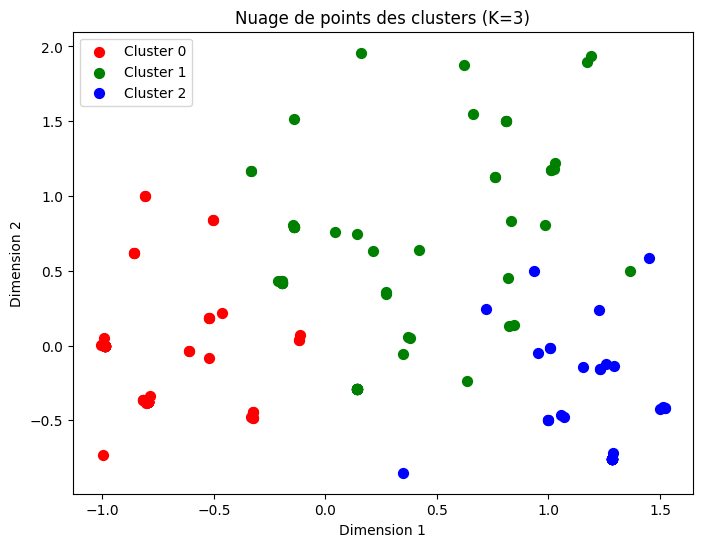

In [ ]:
import matplotlib.pyplot as plt

# Charger le fichier CSV contenant les vecteurs BoW et les étiquettes de cluster
data = pd.read_csv("/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster3_Title.csv")

# Récupérer la colonne "id"
ids = data["id"]

# Supprimer la colonne "id" du DataFrame
data.drop("id", axis=1, inplace=True)

# Spécifier le nombre de clusters (vous pouvez ajuster ce nombre)
nombre_de_clusters = 3

# Créer une instance du modèle K-Means
kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=0)

# Adapter le modèle aux données
kmeans.fit(data)

# Ajouter les étiquettes de cluster au DataFrame original
data["cluster"] = kmeans.labels_

# Réduire les données en 2 dimensions (ou tout autre nombre de dimensions)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop("cluster", axis=1))

# Ajouter les étiquettes de cluster à la version en 2D des données
data_pca = pd.DataFrame(data_pca, columns=["Dimension_1", "Dimension_2"])
data_pca["cluster"] = data["cluster"]

# Créer un nuage de points coloré pour les clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']  # Couleurs pour chaque cluster
for cluster in range(nombre_de_clusters):
    plt.scatter(data_pca[data_pca['cluster'] == cluster]['Dimension_1'],
                data_pca[data_pca['cluster'] == cluster]['Dimension_2'],
                label=f'Cluster {cluster}', c=colors[cluster], s=50)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Nuage de points des clusters (K=3)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


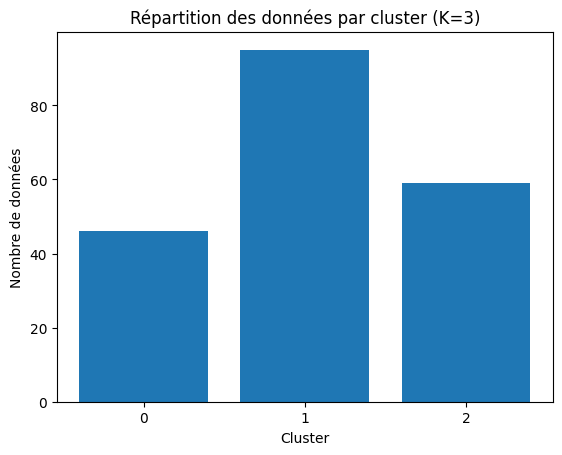

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger le fichier CSV contenant les vecteurs BoW
data = pd.read_csv("/content/drive/MyDrive/TPE_Mon_Travail/BD1-BOW_Title.csv")

# Récupérer la colonne "id"
ids = data["id"]

# Supprimer la colonne "id" du DataFrame
data.drop("id", axis=1, inplace=True)

# Spécifier le nombre de clusters (vous pouvez ajuster ce nombre)
nombre_de_clusters = 3

# Créer une instance du modèle K-Means
kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=0)

# Adapter le modèle aux données
kmeans.fit(data)

# Ajouter les étiquettes de cluster au DataFrame original
data["cluster"] = kmeans.labels_

# Créer un histogramme des clusters
plt.hist(data["cluster"], bins=range(nombre_de_clusters + 1), align="left", rwidth=0.8)
plt.xticks(range(nombre_de_clusters))
plt.xlabel("Cluster")
plt.ylabel("Nombre de données")
plt.title("Répartition des données par cluster (K=3)")
plt.show()


**Cluster** **Pour K = 4**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Charger le fichier CSV contenant les vecteurs BoW
data = pd.read_csv(r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-BOW_Title.csv")

# Récupérer la colonne "id"
ids = data["id"]

# Supprimer la colonne "id" du DataFrame
data.drop("id", axis=1, inplace=True)

# Spécifier le nombre de clusters (vous pouvez ajuster ce nombre)
nombre_de_clusters = 4

# Créer une instance du modèle K-Means
kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=0)

# Adapter le modèle aux données
kmeans.fit(data)

# Ajouter les étiquettes de cluster au DataFrame original
data["cluster"] = kmeans.labels_

# Réinsérer la colonne "id" en première colonne
data.insert(0, "id", ids)

# Enregistrer le DataFrame avec les étiquettes de cluster dans un fichier CSV
data.to_csv(r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster4_Title.csv", index=False)

# Afficher les résultats
print(data)


                   id  agent  arrière  autogir  avion  avoir  aéronef  \
0          F-HPTI.pdf      0        0        0      0      0        0   
1           21AJD.pdf      0        0        0      1      0        0   
2          F-GTPV.pdf      0        0        0      1      0        0   
3          F-HMYY.pdf      0        0        0      0      0        0   
4          F-GYFR.pdf      0        0        0      0      0        0   
..                ...    ...      ...      ...    ...    ...      ...   
195  BEA2020-0165.pdf      0        0        0      1      0        0   
196  BEA2020-0418.pdf      0        0        0      0      0        0   
197  BEA2019-0289.pdf      0        0        0      1      0        0   
198  BEA2020-0373.pdf      0        0        0      2      0        0   
199  BEA2020-0094.pdf      0        0        0      1      0        0   

     balisage  ballon  blesser  ...  remorqueur  sol  structure  terme  \
0           0       0        0  ...           0  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Représentation graphiques**

**Pour K = 4**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


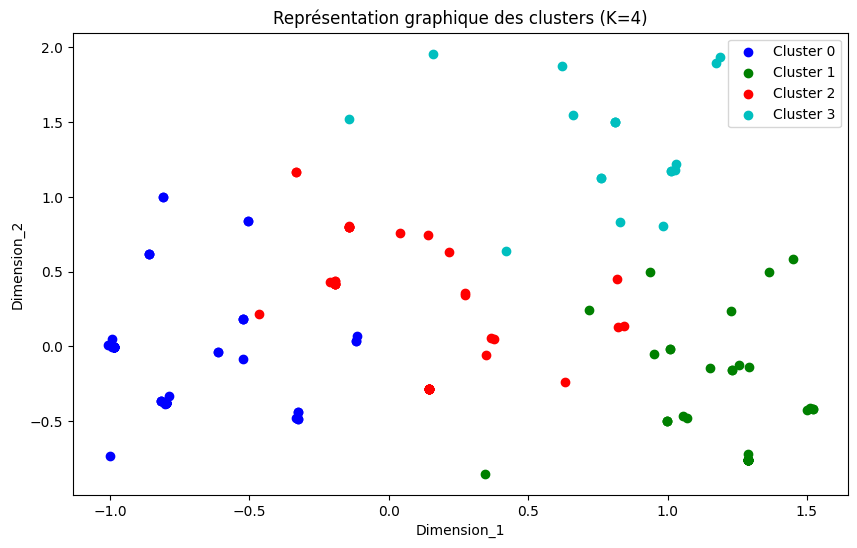

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger le fichier CSV contenant les vecteurs BoW
data = pd.read_csv("/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster4_Title.csv")

# Récupérer la colonne "id"
ids = data["id"]

# Supprimer la colonne "id" du DataFrame
data.drop("id", axis=1, inplace=True)

# Spécifier le nombre de clusters (vous pouvez ajuster ce nombre)
nombre_de_clusters = 4

# Créer une instance du modèle K-Means
kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=0)

# Adapter le modèle aux données
kmeans.fit(data)

# Ajouter les étiquettes de cluster au DataFrame original
data["cluster"] = kmeans.labels_

# Réduire les dimensions des données à 2 composantes avec PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop("cluster", axis=1))

# Ajouter les étiquettes de cluster à la version en 2D des données
data_pca = pd.DataFrame(data_pca, columns=["Dimension_1", "Dimension_2"])
data_pca["cluster"] = data["cluster"]

# Créer un nuage de points avec des couleurs pour chaque cluster
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(nombre_de_clusters):
    cluster_data = data_pca[data_pca['cluster'] == i]
    plt.scatter(cluster_data['Dimension_1'], cluster_data['Dimension_2'], c=colors[i], label=f'Cluster {i}')

plt.xlabel("Dimension_1")
plt.ylabel("Dimension_2")
plt.title("Représentation graphique des clusters (K=4)")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


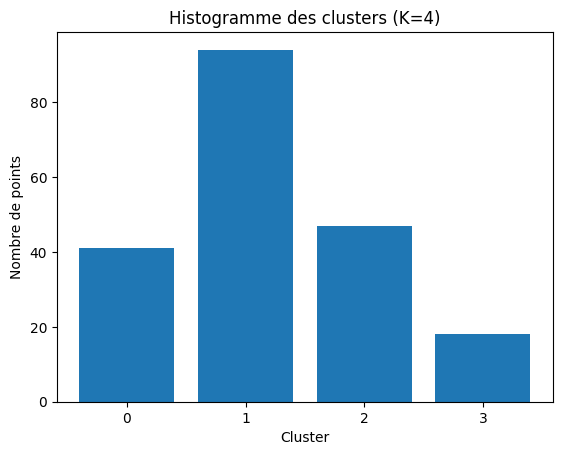

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Charger le fichier CSV contenant les vecteurs BoW
data = pd.read_csv("/content/drive/MyDrive/TPE_Mon_Travail/BD1-BOW_Title.csv")

# Récupérer la colonne "id"
ids = data["id"]

# Supprimer la colonne "id" du DataFrame
data.drop("id", axis=1, inplace=True)

# Spécifier le nombre de clusters (vous pouvez ajuster ce nombre)
nombre_de_clusters = 4

# Créer une instance du modèle K-Means
kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=0)

# Adapter le modèle aux données
kmeans.fit(data)

# Ajouter les étiquettes de cluster au DataFrame original
data["cluster"] = kmeans.labels_

# Créer un histogramme des clusters
plt.hist(data["cluster"], bins=range(0, nombre_de_clusters + 1), align='left', rwidth=0.8)
plt.xlabel('Cluster')
plt.ylabel('Nombre de points')
plt.title('Histogramme des clusters (K=4)')
plt.xticks(range(0, nombre_de_clusters))
plt.show()


**Cluster** **Pour K = 5**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Charger le fichier CSV contenant les vecteurs BoW
data = pd.read_csv(r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-BOW_Title.csv")

# Récupérer la colonne "id"
ids = data["id"]

# Supprimer la colonne "id" du DataFrame
data.drop("id", axis=1, inplace=True)

# Spécifier le nombre de clusters (vous pouvez ajuster ce nombre)
nombre_de_clusters = 5

# Créer une instance du modèle K-Means
kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=0)

# Adapter le modèle aux données
kmeans.fit(data)

# Ajouter les étiquettes de cluster au DataFrame original
data["cluster"] = kmeans.labels_

# Réinsérer la colonne "id" en première colonne
data.insert(0, "id", ids)

# Enregistrer le DataFrame avec les étiquettes de cluster dans un fichier CSV
data.to_csv(r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster5_Title.csv", index=False)

# Afficher les résultats
print(data)


                   id  agent  arrière  autogir  avion  avoir  aéronef  \
0          F-HPTI.pdf      0        0        0      0      0        0   
1           21AJD.pdf      0        0        0      1      0        0   
2          F-GTPV.pdf      0        0        0      1      0        0   
3          F-HMYY.pdf      0        0        0      0      0        0   
4          F-GYFR.pdf      0        0        0      0      0        0   
..                ...    ...      ...      ...    ...    ...      ...   
195  BEA2020-0165.pdf      0        0        0      1      0        0   
196  BEA2020-0418.pdf      0        0        0      0      0        0   
197  BEA2019-0289.pdf      0        0        0      1      0        0   
198  BEA2020-0373.pdf      0        0        0      2      0        0   
199  BEA2020-0094.pdf      0        0        0      1      0        0   

     balisage  ballon  blesser  ...  remorqueur  sol  structure  terme  \
0           0       0        0  ...           0  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


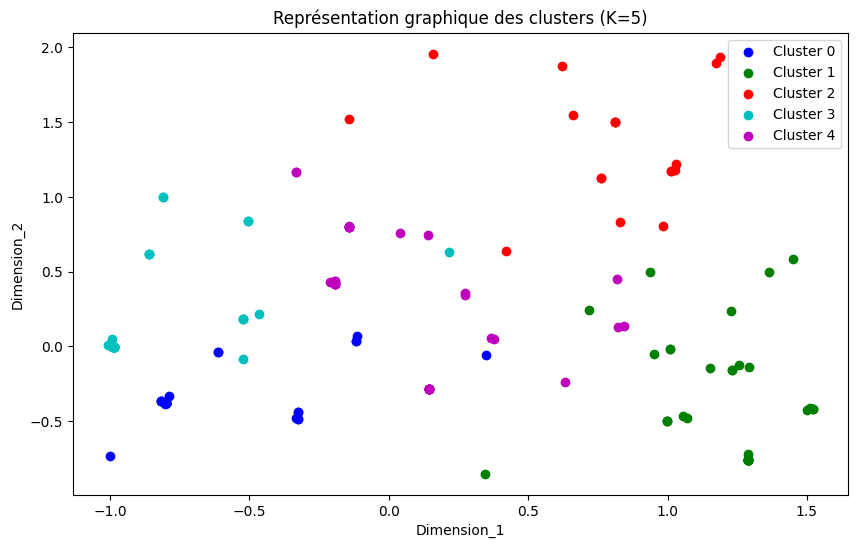

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger le fichier CSV contenant les vecteurs BoW
data = pd.read_csv("/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster5_Title.csv")

# Récupérer la colonne "id"
ids = data["id"]

# Supprimer la colonne "id" du DataFrame
data.drop("id", axis=1, inplace=True)

# Spécifier le nombre de clusters (K=5)
nombre_de_clusters = 5

# Créer une instance du modèle K-Means
kmeans = KMeans(n_clusters=nombre_de_clusters, random_state=0)

# Adapter le modèle aux données
kmeans.fit(data)

# Ajouter les étiquettes de cluster au DataFrame original
data["cluster"] = kmeans.labels_

# Réduire les dimensions des données à 2 composantes avec PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop("cluster", axis=1))

# Ajouter les étiquettes de cluster à la version en 2D des données
data_pca = pd.DataFrame(data_pca, columns=["Dimension_1", "Dimension_2"])
data_pca["cluster"] = data["cluster"]

# Créer un nuage de points avec des couleurs pour chaque cluster
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm']
for i in range(nombre_de_clusters):
    cluster_data = data_pca[data_pca['cluster'] == i]
    plt.scatter(cluster_data['Dimension_1'], cluster_data['Dimension_2'], c=colors[i], label=f'Cluster {i}')

plt.xlabel("Dimension_1")
plt.ylabel("Dimension_2")
plt.title(f"Représentation graphique des clusters (K={nombre_de_clusters})")
plt.legend()
plt.show()


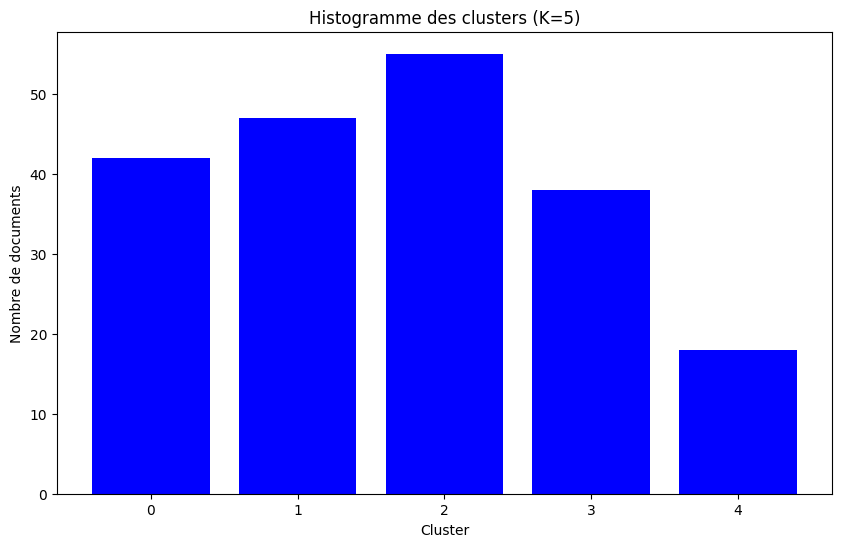

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV contenant la colonne "cluster"
data = pd.read_csv("/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster5_Title.csv")

# Compter le nombre d'occurrences de chaque cluster
cluster_counts = data['cluster'].value_counts().sort_index()

# Générer un graphique à barres empilées
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='b')
plt.title('Histogramme des clusters (K=5)')
plt.xlabel('Cluster')
plt.ylabel('Nombre de documents')
plt.show()


**Regroupement des mots de chaque cluster pour l'analyse**

**Pour K=3**

In [ ]:
import pandas as pd
from collections import Counter

# Charger le fichier CSV contenant les clusters
input_path = r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster3_Title.csv"
data = pd.read_csv(input_path)

# Créez un DataFrame pour stocker les mots clés par cluster
clusters_keywords = pd.DataFrame(columns=["Cluster", "Keywords"])

# Pour chaque cluster unique dans la colonne "cluster"
unique_clusters = data["cluster"].unique()
for cluster_id in unique_clusters:
    # Filtrez les données pour obtenir uniquement les lignes de ce cluster
    cluster_data = data[data["cluster"] == cluster_id]

    # Créez une liste vide pour stocker tous les mots
    all_words = []

    # Parcourez chaque ligne du cluster
    for index, row in cluster_data.iterrows():
        # Sélectionnez les noms des colonnes où la valeur est égale à 1, à l'exception de "cluster"
        words = [col for col in row.index if row[col] == 1 and col != "cluster"]
        all_words.extend(words)

    # Comptez la fréquence de chaque mot
    word_counts = Counter(all_words)

    # Triez les mots-clés par ordre alphabétique
    keywords = sorted(word_counts.keys())

    # Créez une chaîne de mots-clés
    keywords_string = ", ".join(keywords)

    # Ajoutez la paire (Cluster, Mots-clés) au DataFrame clusters_keywords
    clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)

# Enregistrez le DataFrame contenant les mots clés par cluster dans un fichier CSV
output_path = r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster-Liste_Title.csv"
clusters_keywords.to_csv(output_path, index=False)

# Affichez le DataFrame contenant les mots-clés de chaque cluster
print(clusters_keywords)


  Cluster                                           Keywords
0       0  avion, avoir, aéronef, balisage, ballon, bless...
1       1  autogir, avion, blesser, blessé, bord, command...
2       2  agent, arrière, avion, aéronef, blesser, bless...


<ipython-input-38-6fb64c443c02>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)
<ipython-input-38-6fb64c443c02>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)
<ipython-input-38-6fb64c443c02>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)


**Pour K=4**

In [ ]:
import pandas as pd
from collections import Counter

# Charger le fichier CSV contenant les clusters
input_path = r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster4_Title.csv"
data = pd.read_csv(input_path)

# Créez un DataFrame pour stocker les mots clés par cluster
clusters_keywords = pd.DataFrame(columns=["Cluster", "Keywords"])

# Pour chaque cluster unique dans la colonne "cluster"
unique_clusters = data["cluster"].unique()
for cluster_id in unique_clusters:
    # Filtrez les données pour obtenir uniquement les lignes de ce cluster
    cluster_data = data[data["cluster"] == cluster_id]

    # Créez une liste vide pour stocker tous les mots
    all_words = []

    # Parcourez chaque ligne du cluster
    for index, row in cluster_data.iterrows():
        # Sélectionnez les noms des colonnes où la valeur est égale à 1, à l'exception de "cluster"
        words = [col for col in row.index if row[col] == 1 and col != "cluster"]
        all_words.extend(words)

    # Supprimez le mot "cluster" de la liste des mots-clés
    all_words = [word for word in all_words if word != "cluster"]

    # Comptez la fréquence de chaque mot
    word_counts = Counter(all_words)

    # Triez les mots-clés par ordre alphabétique
    keywords = sorted(word_counts.keys())

    # Créez une chaîne de mots-clés
    keywords_string = ", ".join(keywords)

    # Ajoutez la paire (Cluster, Mots-clés) au DataFrame clusters_keywords
    clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)

# Enregistrez le DataFrame contenant les mots clés par cluster dans un fichier CSV
output_path = r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster4-Liste_Title.csv"
clusters_keywords.to_csv(output_path, index=False)

# Affichez le DataFrame contenant les mots-clés de chaque cluster
print(clusters_keywords)


  Cluster                                           Keywords
0       2  avion, avoir, aéronef, balisage, ballon, bless...
1       1  autogir, avion, blesser, blessé, bord, command...
2       3  agent, avion, blesser, cabin, chef, descal, de...
3       0  arrière, avion, aéronef, blesser, blessé, cent...


<ipython-input-39-b44c65cc8c1b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)
<ipython-input-39-b44c65cc8c1b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)
<ipython-input-39-b44c65cc8c1b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)
<ipython-input-39-b44c65cc8c1b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

**Pour K=5**

In [ ]:
import pandas as pd
from collections import Counter

# Charger le fichier CSV contenant les clusters
input_path = r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster5_Title.csv"
data = pd.read_csv(input_path)

# Créez un DataFrame pour stocker les mots clés par cluster
clusters_keywords = pd.DataFrame(columns=["Cluster", "Keywords"])

# Pour chaque cluster unique dans la colonne "cluster"
unique_clusters = data["cluster"].unique()
for cluster_id in unique_clusters:
    # Filtrez les données pour obtenir uniquement les lignes de ce cluster
    cluster_data = data[data["cluster"] == cluster_id]

    # Créez une liste vide pour stocker tous les mots
    all_words = []

    # Parcourez chaque ligne du cluster
    for index, row in cluster_data.iterrows():
        # Sélectionnez les noms des colonnes où la valeur est égale à 1, à l'exception de "cluster"
        words = [col for col in row.index if row[col] == 1 and col != "cluster"]
        all_words.extend(words)

    # Supprimez le mot "cluster" de la liste des mots-clés
    all_words = [word for word in all_words if word != "cluster"]

    # Comptez la fréquence de chaque mot
    word_counts = Counter(all_words)

    # Triez les mots-clés par ordre alphabétique
    keywords = sorted(word_counts.keys())

    # Créez une chaîne de mots-clés
    keywords_string = ", ".join(keywords)

    # Ajoutez la paire (Cluster, Mots-clés) au DataFrame clusters_keywords
    clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)

# Enregistrez le DataFrame contenant les mots clés par cluster dans un fichier CSV
output_path = r"/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster5-Liste_Title.csv"
clusters_keywords.to_csv(output_path, index=False)

# Affichez le DataFrame contenant les mots-clés de chaque cluster
print(clusters_keywords)


<ipython-input-19-75cffbc3c058>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)
<ipython-input-19-75cffbc3c058>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)
<ipython-input-19-75cffbc3c058>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clusters_keywords = clusters_keywords.append({"Cluster": cluster_id, "Keywords": keywords_string}, ignore_index=True)
<ipython-input-19-75cffbc3c058>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

  Cluster                                           Keywords
0       1  avion, avoir, aéronef, balisage, ballon, bless...
1       2  autogir, avion, bord, commande, dispositif, dé...
2       3  avion, blesser, blessé, deux, décéder, désigna...
3       4  agent, avion, blesser, blessé, cabin, chef, da...
4       0  arrière, avion, aéronef, blesser, central, dis...


**Extraction de tout le contenu**

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 686.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 45.3 MB/s eta 0:00:00


In [ ]:
import os
import pdfplumber
import spacy
import pandas as pd

# Charger le modèle de langue SpaCy
nlp = spacy.load("en_core_web_sm")

# Expressions à supprimer
expressions_a_supprimer = [
    "RAPPORT","ACCIDENT","www","bea","aero","D","ENQUETE","SECURITE","BEA_Aero"
]

# Fonction pour filtrer les éléments non importants
def is_important(token):
    return not (token.is_stop or token.is_punct or token.pos_ in ['DET', 'PRON', 'PREP'])

# Fonction pour extraire le contenu et effectuer le traitement linguistique
def extract_text(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        extracted_text = ""

        for page_num in range(len(pdf.pages)):
            page_text = pdf.pages[page_num].extract_text()
            extracted_text += page_text

        # Supprimer les expressions à supprimer
        for expression in expressions_a_supprimer:
            extracted_text = extracted_text.replace(expression, "")

        doc = nlp(extracted_text)
        important_tokens = [token.text for token in doc if is_important(token)]
        named_entities = [(ent.text, ent.label_) for ent in doc.ents]
        parsed_trees = [sent for sent in doc.sents]

        return extracted_text, important_tokens, named_entities, parsed_trees

# Liste pour stocker les données avant de les enregistrer dans un DataFrame
data_list = []

pdf_folder = "/content/drive/MyDrive/TPE_Mon_Travail/Rapport_BEA"
pdf_files = [os.path.join(pdf_folder, f) for f in os.listdir(pdf_folder) if f.endswith(".pdf")]

for pdf_file in pdf_files:
    extracted_text, important_tokens, named_entities, parsed_trees = extract_text(pdf_file)

    # Ajouter les données à la liste
    data_list.append({
        "id": pdf_file,
        "contenu": extracted_text
    })

# Créer un DataFrame pandas à partir de la liste de données
df = pd.DataFrame(data_list)

# Chemin vers le fichier CSV de sortie
output_file_path = "/content/drive/MyDrive/TPE_Mon_Travail/dataset_Contenu.csv"

# Enregistrer le DataFrame dans un fichier CSV
df.to_csv(output_file_path, index=False, encoding='utf-8')

print("Résultats enregistrés dans le fichier:", output_file_path)


Résultats enregistrés dans le fichier: /content/drive/MyDrive/TPE_Mon_Travail/dataset_Contenu.csv


**Nettoyage de l'Extraction de tous les contenus**

In [ ]:
import pandas as pd
import re
from google.colab import drive

# Monter Google Drive pour accéder aux fichiers
drive.mount('/content/drive')

# Chemin vers le fichier CSV sur Google Drive
csv_file_path = "/content/drive/MyDrive/TPE_Mon_Travail/dataset_Contenu.csv"

# Lire le fichier CSV en utilisant pandas
data = pd.read_csv(csv_file_path, encoding='utf-8')

# Supprimer l'expression "Conséquences et dommages" de la colonne "contenu"
data['contenu'] = data['contenu'].str.replace('Conséquences et dommages', '')

# Liste des catégories d'éléments à supprimer
categories_a_supprimer = {
    "Articles définis": ["le", "la", "les", "l'"],
    "Prépositions et articles partitifs": ["de", "du", "des", "d'", "d", "au", "aux", "en"],
    "Articles indéfinis": ["un", "une"],
    "Prépositions": ["à", "dans", "sur", "pour", "par", "pas", "sans", "avec", "où"],
    "Conjonction de coordination": ["et", "car", "ou"],
    "Pronoms relatifs": ["que", "qui", "qu'"],
    "Pronoms personnels et réflexifs": ["il", "nous", "ce", "ces", "se", "ceci", "donc", "dont", "alors", "lors", "autre","en"]
}

# Fonction pour nettoyer le texte en supprimant les articles et les mots courts
def nettoyer_texte(texte, mots_a_supprimer):
    # Utiliser une expression régulière pour séparer les mots
    mots = re.findall(r'\b\w+\b', str(texte))

    # Filtrer les mots en supprimant les articles, les mots spécifiques
    # et les mots courts (un ou deux caractères)
    mots_filtrés = [mot for mot in mots if len(mot) > 2 and mot.lower() not in mots_a_supprimer]

    # Rejoindre les mots filtrés pour former le texte nettoyé
    texte_nettoyé = ' '.join(mots_filtrés)
    return texte_nettoyé

# Appliquer la fonction de nettoyage à la colonne de contenu
for categorie, mots_a_supprimer in categories_a_supprimer.items():
    data['contenu'] = data['contenu'].apply(lambda x: nettoyer_texte(x, mots_a_supprimer))

# Supprimer le chemin "/content/drive/MyDrive/TPE_Mon_Travail/Rapport_BEA" de la colonne 'id'
data['id'] = data['id'].str.split("/").str[-1]

# Enregistrer le résultat dans un nouveau fichier CSV sur Google Drive avec un encodage spécifique (par exemple, UTF-8)
cleaned_csv_file_path = "/content/drive/MyDrive/TPE_Mon_Travail/BD2_Contenu.csv"
data.to_csv(cleaned_csv_file_path, index=False, encoding='utf-8')

# Afficher les premières lignes du DataFrame nettoyé
print(data)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                   id                                            contenu
0          F-HPTI.pdf  Accident hélicoptère GUIMBAL CABRI immatriculé...
1           21AJD.pdf  Accident survenu ULM multiaxes HUMBERT AVIATIO...
2          F-GTPV.pdf  Accident survenu avion ROBIN R400 180 immatric...
3          F-HMYY.pdf  Accident survenu avion ROBIN R400 500 immatric...
4          F-GYFR.pdf  Accident survenu ballon ULTRAMAGIC M105 immatr...
..                ...                                                ...
195  BEA2020-0165.pdf  ENQUÊTE Accident planeur CENTRAIR 101A PEGASE ...
196  BEA2020-0418.pdf  ENQUÊTE Accident ballon air chaud Schroeder Fi...
197  BEA2019-0289.pdf  ENQUÊTE Accident hélicoptère ROBINSON R22 BETA...
198  BEA2020-0373.pdf  ENQUÊTE Planeur dispositif Accident ULM planeu...
199  BEA2020-0094.pdf  ENQUÊTE Accident avion Piper Séminole immatri

**Le Doc2Vec sur le contenu**

In [ ]:
!pip install gensim

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import multiprocessing

# Charger le DataFrame
input_path = r"/content/drive/MyDrive/TPE_Mon_Travail/BD2_Contenu.csv"
data = pd.read_csv(input_path)

# Tokenization : Divisez le texte en mots
data['tokens'] = data['contenu'].apply(lambda x: word_tokenize(x.lower()))

# Créez des documents étiquetés pour Doc2Vec
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data['tokens'])]

# Configuration de Doc2Vec
cores = multiprocessing.cpu_count()
model = Doc2Vec(vector_size=100,  # Taille des vecteurs de mots
                window=5,  # Fenêtre contextuelle
                min_count=1,  # Ignorer les mots avec une fréquence inférieure à 1
                workers=cores,  # Nombre de cœurs CPU à utiliser
                dm=1,  # Utiliser l'algorithme de "Distributed Memory"
                dbow_words=1)  # Entraîner des vecteurs de mots

# Construction du vocabulaire
model.build_vocab(documents)

# Entraînement du modèle Doc2Vec
model.train(documents, total_examples=model.corpus_count, epochs=10)

# Obtenir les vecteurs de documents
document_vectors = [model.infer_vector(doc.words) for doc in documents]

# Créez un DataFrame pour les vecteurs de documents
vectors_df = pd.DataFrame(document_vectors, columns=[f"d_{i}" for i in range(model.vector_size)])

# Créer un DataFrame avec la colonne "id"
id_df = data[['id']]

# Enregistrez le DataFrame résultant
output_path = r"/content/drive/MyDrive/TPE_Mon_Travail/BD2_Contenu-Doc2Vec.csv"
result_df = pd.concat([id_df, vectors_df], axis=1)
result_df.to_csv(output_path, index=False)

# Affichez le DataFrame résultant avec la colonne "id" et les vecteurs de documents
print(result_df)


                   id       d_0       d_1       d_2       d_3       d_4  \
0          F-HPTI.pdf  0.167122  0.425665  0.396652 -0.854497 -0.151318   
1           21AJD.pdf -1.318398 -0.368693 -2.187209 -0.265002 -0.221460   
2          F-GTPV.pdf  1.148463 -0.624393 -0.773549  0.509976  1.997171   
3          F-HMYY.pdf -0.169123 -0.497370 -1.251933  0.295527 -0.023879   
4          F-GYFR.pdf -0.221414 -1.003138 -0.527638 -1.214949 -0.998163   
..                ...       ...       ...       ...       ...       ...   
195  BEA2020-0165.pdf -3.783556 -2.833778 -1.002487 -1.265158 -0.832366   
196  BEA2020-0418.pdf -1.875616 -1.048386 -1.571274 -1.695982 -2.069249   
197  BEA2019-0289.pdf -0.091385  0.614982 -0.546278 -0.894724  0.035714   
198  BEA2020-0373.pdf -1.382570 -0.864869 -0.803341  0.331644 -1.067545   
199  BEA2020-0094.pdf -0.120149 -0.658675 -0.077455  0.272081  0.176849   

          d_5       d_6       d_7       d_8  ...      d_90      d_91  \
0    1.069840 -0.658149  0.

**Fusion Titre et contenu**

In [ ]:
import pandas as pd

# Chemins d'accès vers les fichiers CSV
path_bow = "/content/drive/MyDrive/TPE_Mon_Travail/BD1-Cluster3_Title.csv"
path_doc2vec = "/content/drive/MyDrive/TPE_Mon_Travail/BD2_Contenu-Doc2Vec.csv"

# Charger les deux DataFrames
df_bow = pd.read_csv(path_bow)
df_doc2vec = pd.read_csv(path_doc2vec)

# Fusionner les deux DataFrames en fonction de la colonne "id"
merged_df = df_bow.merge(df_doc2vec, on="id")

# Déplacer la colonne "cluster" à la fin du DataFrame fusionné
cluster_column = merged_df.pop("cluster")
merged_df["cluster"] = cluster_column

# Enregistrer le DataFrame fusionné dans un nouveau fichier CSV
output_path = "/content/drive/MyDrive/TPE_Mon_Travail/BD_Fusion.csv"
merged_df.to_csv(output_path, index=False)

# Afficher le DataFrame fusionné
print(merged_df)


                   id  agent  arrière  autogir  avion  avoir  aéronef  \
0          F-HPTI.pdf      0        0        0      0      0        0   
1           21AJD.pdf      0        0        0      1      0        0   
2          F-GTPV.pdf      0        0        0      1      0        0   
3          F-HMYY.pdf      0        0        0      0      0        0   
4          F-GYFR.pdf      0        0        0      0      0        0   
..                ...    ...      ...      ...    ...    ...      ...   
195  BEA2020-0165.pdf      0        0        0      1      0        0   
196  BEA2020-0418.pdf      0        0        0      0      0        0   
197  BEA2019-0289.pdf      0        0        0      1      0        0   
198  BEA2020-0373.pdf      0        0        0      2      0        0   
199  BEA2020-0094.pdf      0        0        0      1      0        0   

     balisage  ballon  blesser  ...      d_91      d_92      d_93      d_94  \
0           0       0        0  ...  1.89922

In [ ]:
df_bow = pd.read_csv(path_bow)
df_doc2vec = pd.read_csv(path_doc2vec)
df_cluster=df_bow.drop(columns=df_bow.columns[1:-1])
merged_df = df_cluster.merge(df_doc2vec, on="id")

# Déplacer la colonne "cluster" à la fin du DataFrame fusionné
cluster_column = merged_df.pop("cluster")
merged_df["cluster"] = cluster_column

# Enregistrer le DataFrame fusionné dans un nouveau fichier CSV
output_path = "/content/drive/MyDrive/TPE_Mon_Travail/BD_Fusion.csv"
merged_df.to_csv(output_path, index=False)

# Afficher le DataFrame fusionné
print(merged_df)


                   id       d_0       d_1       d_2       d_3       d_4  \
0          F-HPTI.pdf  0.167122  0.425665  0.396652 -0.854497 -0.151318   
1           21AJD.pdf -1.318398 -0.368693 -2.187209 -0.265002 -0.221460   
2          F-GTPV.pdf  1.148462 -0.624393 -0.773549  0.509976  1.997171   
3          F-HMYY.pdf -0.169123 -0.497370 -1.251934  0.295527 -0.023879   
4          F-GYFR.pdf -0.221414 -1.003138 -0.527638 -1.214949 -0.998163   
..                ...       ...       ...       ...       ...       ...   
195  BEA2020-0165.pdf -3.783556 -2.833778 -1.002487 -1.265158 -0.832366   
196  BEA2020-0418.pdf -1.875616 -1.048387 -1.571274 -1.695982 -2.069249   
197  BEA2019-0289.pdf -0.091385  0.614982 -0.546277 -0.894724  0.035714   
198  BEA2020-0373.pdf -1.382570 -0.864869 -0.803341  0.331644 -1.067545   
199  BEA2020-0094.pdf -0.120149 -0.658675 -0.077455  0.272081  0.176849   

          d_5       d_6       d_7       d_8  ...      d_91      d_92  \
0    1.069840 -0.658149  0.

**Entrainement du modèle**

In [ ]:
df_doc2vec

,id,d_0,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_90,d_91,d_92,d_93,d_94,d_95,d_96,d_97,d_98,d_99
0,F-HPTI.pdf,0.167122,0.425665,0.396652,-0.854497,-0.151318,1.069840,-0.658149,0.581857,-1.380702,...,-0.532059,1.899226,-1.129827,0.065673,2.392438,0.401919,1.754292,-2.031988,0.110303,-0.366021
1,21AJD.pdf,-1.318398,-0.368693,-2.187209,-0.265002,-0.221460,-0.269777,-0.031805,-0.927879,0.270579,...,-2.478697,2.363641,0.462150,1.901352,-0.488309,0.300509,1.376710,-0.680368,-0.496508,1.261054
2,F-GTPV.pdf,1.148462,-0.624393,-0.773549,0.509976,1.997171,-1.540675,0.768435,1.289634,2.329049,...,-0.947407,1.699171,-1.728869,0.257427,-0.679808,1.418033,0.249733,-0.095056,1.866354,-0.639240
3,F-HMYY.pdf,-0.169123,-0.497370,-1.251934,0.295527,-0.023879,0.161248,0.250402,0.324523,2.483367,...,-1.342541,1.623744,-0.852231,0.438351,-0.179391,0.771275,0.808924,-0.559569,1.052498,-0.082230
4,F-GYFR.pdf,-0.221414,-1.003138,-0.527638,-1.214949,-0.998163,-0.536386,-0.189751,0.159666,1.082207,...,-1.344633,0.897765,0.144774,0.671673,0.456473,0.311619,0.268784,-1.236218,0.588090,-0.403095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,BEA2020-0165.pdf,-3.783556,-2.833778,-1.002487,-1.265158,-0.832366,-1.289697,1.944195,0.893414,-0.849189,...,0.481557,0.202233,-1.155015,0.981203,2.578071,1.175553,0.313487,-0.324342,0.803253,0.489916
196,BEA2020-0418.pdf,-1.875616,-1.048387,-1.571274,-1.695982,-2.069249,0.257409,-0.806848,-0.438950,0.896440,...,-1.945539,1.228573,0.542578,0.997799,1.201220,0.560352,0.796868,-1.622228,0.734547,1.000461
197,BEA2019-0289.pdf,-0.091385,0.614982,-0.546277,-0.894724,0.035714,0.469998,0.019560,0.477611,-0.428384,...,-0.675824,1.521339,-0.405184,-0.220542,1.407984,0.322209,1.148276,-1.602976,0.449018,-0.149340
198,BEA2020-0373.pdf,-1.382570,-0.864869,-0.803341,0.331644,-1.067545,0.102995,0.096199,0.378226,-0.389352,...,-1.321643,1.517133,-0.115872,-0.272807,0.948064,-0.005104,0.785224,-0.673855,0.264025,0.598484


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Chemin vers le fichier CSV (assurez-vous de spécifier le chemin correct)
#csv_file_path = "/content/drive/MyDrive/TPE_Mon_Travail/BD_Fusion.csv"

# Lire le fichier CSV en utilisant pandas
#data = pd.read_csv(csv_file_path, encoding='utf-8')
data=merged_df
print(data.shape)

# Séparer les caractéristiques (X) de la variable cible (y)
X = data.values[:,1:-1]
y = data["cluster"]
print(X.shape)
print(y.shape)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer une instance du modèle KNeighborsClassifier (KNN) avec k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle KNN sur l'ensemble d'entraînement
knn.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude du modèle : {accuracy}")

# Afficher le rapport de classification
class_report = classification_report(y_test, y_pred)
print("Rapport de classification :\n", class_report)

# Sauvegarder les prédictions dans un fichier CSV
predictions_df = pd.DataFrame({'Vraie valeur': y_test, 'Prédiction': y_pred})
predictions_csv_path = "/content/drive/MyDrive/TPE_Mon_Travail/predictions_knn.csv"
predictions_df.to_csv(predictions_csv_path, index=False)

# Afficher les prédictions
print("Prédictions :\n", predictions_df)


(200, 102)
(200, 100)
(200,)
Exactitude du modèle : 0.5
Rapport de classification :
               precision    recall  f1-score   support

           0       0.40      0.31      0.35        13
           1       0.59      0.77      0.67        13
           2       0.46      0.43      0.44        14

    accuracy                           0.50        40
   macro avg       0.48      0.50      0.49        40
weighted avg       0.48      0.50      0.49        40

Prédictions :
      Vraie valeur  Prédiction
95              0           2
15              1           1
30              0           2
158             2           0
128             0           2
115             1           1
69              1           0
170             0           0
174             1           1
45              2           1
66              1           0
182             2           2
165             1           1
78              2           1
186             1           1
177             2           2
56       